# **수요를 통한 부동산 살펴보기**

## **어떤 지역이 수요가 높을까**

- 수요는 재화에 대해 사람들이 원하는 정도를 의미
  - 수요가 높을수록 가격은 상승
- 부동산 시장에서는 전세를 통해 수요를 유추 가능
- 전세 -> 전세금을 내고 계약 기간 동안 해당 주택을 사용하는 계약
    - 전세 이용자는 주택의 가격과 상관 없이 특정 기간 동안 주택의 사용가치만을 누리기 때문에 실수요자로 판단 가능
 
- 매매 대비 전세가 -> **전세 비율**이 높다면 실수요의 압력이 높은 상태로, 이 압력은 언제든지 매매가의 상승으로 전환 가능

 ### 전세비율이 상승하면서 매매가와 전세가가 함께 오르는 곳을 주목
 - 매매가와 전세가가 함께 오르면서 전세비율이 높아진다는 의미는 전세가의 상승이 더 가파르다는 의미.
 - 실수요의 압력이 매매가로 전환되는 순간으로 부동산 가격 상승의 초기일 확률이 높음
 - 반대로 매매가는 빠르게 오르는데 전세강의 움직이 이를 따라가지 못하거나 지지부진하다면 이미 충분히 오른 상태로, 실수요보다 투자수요가 더 많다는 신호일 확률이 높음

## 정리
### 목적
- 수요가 높은 지역
    - 실수요 - 전세가격, 투자수요 - 매매가격
    - 전세는 실수요로 이루어져 있기 때문에 전세가 상승은 실수요의 상승을 의미
    - **하지만** 실수요가 증가한다고 매매가가 상승하는 것은 아님
- 투자수요와 실수요가 함계 상승하는 지역을 찾기 위해 **전세가와 매매가**가 함꼐 상승하는 지역을 찾아야함
    - 매매가보다 전세가가 빠르게 상승하는 지역, 매매가와 전세가가 함께 상승하되, **전세가율이 높아지는 지역**을 찾아야함 

In [17]:
import xlwings as xw
import pandas as pd

def KBpriceindex_preprocessing(path, data_type):
    
    wb = xw.Book(path)                
    sheet = wb.sheets[data_type]   
    row_num = sheet.range(1,1).end('down').end('down').end('down').row  
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기' 
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12 :
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data


path = r'../../★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
price_index = KBpriceindex_preprocessing(path, '매매apt')
jeonse_index = KBpriceindex_preprocessing(path, '전세apt')

C:\Users\laiep\AppData\Local\Temp\ipykernel_34628\3262652260.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
C:\Users\laiep\AppData\Local\Temp\ipykernel_34628\3262652260.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_col_data.set_index(pd.to_datetime(new_index), inplace=True)


In [21]:
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


In [23]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

index_date = datetime(2010,1,1)
time_range = 12
prev_date = index_date - relativedelta(months=time_range)

print(index_date)
print(prev_date)

price_index.loc[index_date]

2010-01-01 00:00:00
2009-01-01 00:00:00


전국    전국      78.087161
서울    서울      82.455087
      강북      84.232411
      강북구     88.872226
      광진구      80.58185
                ...    
경남    김해      66.239785
      통영           None
제주도   제주도          None
      서귀포     62.336142
기타지방  기타지방    74.395461
Name: 2010-01-01 00:00:00, Length: 186, dtype: object

In [31]:
demand_df = pd.DataFrame()
demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date]) / price_index.loc[prev_date]
demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date]) / jeonse_index.loc[prev_date]

In [33]:
demand_df

매매증감률     전세증감률
전국   전국    0.024178  0.062333
서울   서울    0.036148  0.105536
     강북    0.015827  0.071413
     강북구   -0.00328  0.038468
     광진구   0.021929  0.147834
...             ...       ...
경남   김해    0.021828   0.01335
     통영         NaN       NaN
제주도  제주도        NaN       NaN
     서귀포   0.026418  0.030383
기타지방 기타지방  0.027169  0.036905

[186 rows x 2 columns]

In [45]:
prev_date2 = index_date - relativedelta(months=time_range*3)
price_index[prev_date2:index_date][:-1].max()

전국    전국      77.972536
서울    서울      82.595777
      강북      84.973577
      강북구     91.125252
      광진구     83.438662
                ...    
경남    김해      66.057002
      통영           None
제주도   제주도          None
      서귀포     62.124924
기타지방  기타지방    74.214664
Length: 186, dtype: object

In [49]:
demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값'])/demand_df['이전최대값']

In [55]:
demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
demand_df['전세가상승'] = demand_df['이전최대값'] > 0.01
demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0

In [57]:
demand_df

매매증감률     전세증감률      이전최대값  최댓값대비증감률  매매가상승  전세가상승  더빠른전세상승  \
전국   전국    0.024178  0.062333  77.972536   0.00147   True   True     True   
서울   서울    0.036148  0.105536  82.595777 -0.001703   True   True     True   
     강북    0.015827  0.071413  84.973577 -0.008722   True   True     True   
     강북구   -0.00328  0.038468  91.125252 -0.024725  False   True     True   
     광진구   0.021929  0.147834  83.438662 -0.034238   True   True     True   
...             ...       ...        ...       ...    ...    ...      ...   
경남   김해    0.021828   0.01335  66.057002  0.002767   True   True    False   
     통영         NaN       NaN       None       NaN  False  False    False   
제주도  제주도        NaN       NaN       None       NaN  False  False    False   
     서귀포   0.026418  0.030383  62.124924    0.0034   True   True     True   
기타지방 기타지방  0.027169  0.036905  74.214664  0.002436   True   True     True   

           최댓값대비상승  
전국   전국       True  
서울   서울      False  
     강북      False  
     강북구     False  
     광진구     False  
...            ...  
경남   김해       True  
     통영      False  
제주도  제주도     False  
     서귀포      True  
기타지방 기타지방     True  

[186 rows x 8 columns]

In [61]:
demand_df['수요총합'] = demand_df[['매매가상승', '전세가상승', '더빠른전세상승', '최댓값대비상승']].sum(axis=1)

In [63]:
demand_df

매매증감률     전세증감률      이전최대값  최댓값대비증감률  매매가상승  전세가상승  더빠른전세상승  \
전국   전국    0.024178  0.062333  77.972536   0.00147   True   True     True   
서울   서울    0.036148  0.105536  82.595777 -0.001703   True   True     True   
     강북    0.015827  0.071413  84.973577 -0.008722   True   True     True   
     강북구   -0.00328  0.038468  91.125252 -0.024725  False   True     True   
     광진구   0.021929  0.147834  83.438662 -0.034238   True   True     True   
...             ...       ...        ...       ...    ...    ...      ...   
경남   김해    0.021828   0.01335  66.057002  0.002767   True   True    False   
     통영         NaN       NaN       None       NaN  False  False    False   
제주도  제주도        NaN       NaN       None       NaN  False  False    False   
     서귀포   0.026418  0.030383  62.124924    0.0034   True   True     True   
기타지방 기타지방  0.027169  0.036905  74.214664  0.002436   True   True     True   

           최댓값대비상승  수요총합  
전국   전국       True     4  
서울   서울      False     3  
     강북      False     3  
     강북구     False     2  
     광진구     False     3  
...            ...   ...  
경남   김해       True     3  
     통영      False     0  
제주도  제주도     False     0  
     서귀포      True     4  
기타지방 기타지방     True     4  

[186 rows x 9 columns]

In [67]:
demand_df = demand_df[demand_df['수요총합'] == 4]

In [69]:
demand_df

매매증감률     전세증감률      이전최대값  최댓값대비증감률  매매가상승  전세가상승  더빠른전세상승  \
전국    전국     0.024178  0.062333  77.972536   0.00147   True   True     True   
서울    동대문구   0.015278  0.050224  81.585679  0.001326   True   True     True   
      종로구    0.033816  0.055268  87.763135  0.001398   True   True     True   
      강남     0.053193  0.134123  80.941221  0.000815   True   True     True   
      영등포구   0.044627  0.082925  77.730225   0.00269   True   True     True   
6개광역시 6개광역시  0.028194  0.047738  69.036974  0.003211   True   True     True   
부산    부산     0.067447  0.072924  63.838859  0.006188   True   True     True   
      중구     0.028688  0.029058  78.862428  0.000339   True   True     True   
      동래구    0.052073  0.067137  62.731047  0.005814   True   True     True   
      북구     0.075813   0.10479  62.441889   0.00986   True   True     True   
      해운대구   0.079526   0.08305  65.242276  0.009691   True   True     True   
      사하구    0.074493  0.086623  66.485535  0.004737   True   True     True   
      금정구     0.04519  0.056435  66.986602  0.003933   True   True     True   
      사상구    0.080111  0.097206  60.348896   0.00558   True   True     True   
광주    남구     0.015637  0.042579  62.987446  0.004899   True   True     True   
대전    대전     0.067899  0.125325  74.231991  0.006113   True   True     True   
      동구     0.065121  0.097178  74.696181  0.005757   True   True     True   
      중구     0.041137  0.080917  73.057171  0.004514   True   True     True   
      서구     0.095841  0.174832  74.793651  0.007916   True   True     True   
      유성구    0.045822  0.140364  77.913834  0.003741   True   True     True   
울산    울산     0.028486  0.041204  72.816333  0.003306   True   True     True   
      동구     0.010296  0.028178  79.246544  0.000001   True   True     True   
      북구      0.05098  0.064285  76.330267  0.002443   True   True     True   
      울주군    0.010208  0.045699  67.101076  0.000204   True   True     True   
5개광역시 5개광역시  0.035761  0.051944  63.906451  0.004037   True   True     True   
충북    충북     0.018922  0.042364  71.373266  0.002155   True   True     True   
      청주     0.021253  0.039222  71.384823  0.001913   True   True     True   
      상당구    0.036246  0.045287  74.318468  0.001217   True   True     True   
      흥덕구    0.011129  0.035166  69.913379  0.002395   True   True     True   
전북    전북     0.061763  0.076595  77.924257  0.004039   True   True     True   
      덕진구    0.075155  0.079114  74.446891  0.003668   True   True     True   
      익산     0.057457  0.075724  79.263709  0.004751   True   True     True   
전남    전남     0.044728   0.05371  78.865757  0.005871   True   True     True   
      목포     0.023157  0.023657  71.511515  0.002292   True   True     True   
      순천      0.02023  0.030745  84.143193   0.00671   True   True     True   
      여수     0.062314    0.0848  76.506255  0.001512   True   True     True   
경남    경남     0.033271  0.044384  73.936273  0.002569   True   True     True   
      창원     0.036726  0.045938  75.860842  0.003456   True   True     True   
      양산     0.013679  0.051473  63.966163  0.002366   True   True     True   
      거제     0.113989  0.114671  97.402669  0.000454   True   True     True   
제주도   서귀포    0.026418  0.030383  62.124924    0.0034   True   True     True   
기타지방  기타지방   0.027169  0.036905  74.214664  0.002436   True   True     True   

             최댓값대비상승  수요총합  
전국    전국        True     4  
서울    동대문구      True     4  
      종로구       True     4  
      강남        True     4  
      영등포구      True     4  
6개광역시 6개광역시     True     4  
부산    부산        True     4  
      중구        True     4  
      동래구       True     4  
      북구        True     4  
      해운대구      True     4  
      사하구       True     4  
      금정구       True     4  
      사상구       True     4  
광주    남구        True     4  
대전    대전        True     4  
      동구        True     4  
      중구        True     4  
      서구        True     4  
      유성구       True     4  
울산    울산 

In [71]:
demand_df.loc[[('서울','동대문구'), ('부산', '중구')]]

,,매매증감률,전세증감률,이전최대값,최댓값대비증감률,매매가상승,전세가상승,더빠른전세상승,최댓값대비상승,수요총합
서울,동대문구,0.015278,0.050224,81.585679,0.001326,True,True,True,True,4
부산,중구,0.028688,0.029058,78.862428,0.000339,True,True,True,True,4


In [75]:
selected_index = []

for name in demand_df.index:
    if name[0] is not name[1]:
        selected_index.append((name[0], name[1]))

In [79]:
demand_df = demand_df.loc[selected_index]

In [81]:
demand_df

매매증감률     전세증감률      이전최대값  최댓값대비증감률  매매가상승  전세가상승  더빠른전세상승  \
서울  동대문구  0.015278  0.050224  81.585679  0.001326   True   True     True   
    종로구   0.033816  0.055268  87.763135  0.001398   True   True     True   
    강남    0.053193  0.134123  80.941221  0.000815   True   True     True   
    영등포구  0.044627  0.082925  77.730225   0.00269   True   True     True   
부산  중구    0.028688  0.029058  78.862428  0.000339   True   True     True   
    동래구   0.052073  0.067137  62.731047  0.005814   True   True     True   
    북구    0.075813   0.10479  62.441889   0.00986   True   True     True   
    해운대구  0.079526   0.08305  65.242276  0.009691   True   True     True   
    사하구   0.074493  0.086623  66.485535  0.004737   True   True     True   
    금정구    0.04519  0.056435  66.986602  0.003933   True   True     True   
    사상구   0.080111  0.097206  60.348896   0.00558   True   True     True   
광주  남구    0.015637  0.042579  62.987446  0.004899   True   True     True   
대전  동구    0.065121  0.097178  74.696181  0.005757   True   True     True   
    중구    0.041137  0.080917  73.057171  0.004514   True   True     True   
    서구    0.095841  0.174832  74.793651  0.007916   True   True     True   
    유성구   0.045822  0.140364  77.913834  0.003741   True   True     True   
울산  동구    0.010296  0.028178  79.246544  0.000001   True   True     True   
    북구     0.05098  0.064285  76.330267  0.002443   True   True     True   
    울주군   0.010208  0.045699  67.101076  0.000204   True   True     True   
충북  청주    0.021253  0.039222  71.384823  0.001913   True   True     True   
    상당구   0.036246  0.045287  74.318468  0.001217   True   True     True   
    흥덕구   0.011129  0.035166  69.913379  0.002395   True   True     True   
전북  덕진구   0.075155  0.079114  74.446891  0.003668   True   True     True   
    익산    0.057457  0.075724  79.263709  0.004751   True   True     True   
전남  목포    0.023157  0.023657  71.511515  0.002292   True   True     True   
    순천     0.02023  0.030745  84.143193   0.00671   True   True     True   
    여수    0.062314    0.0848  76.506255  0.001512   True   True     True   
경남  창원    0.036726  0.045938  75.860842  0.003456   True   True     True   
    양산    0.013679  0.051473  63.966163  0.002366   True   True     True   
    거제    0.113989  0.114671  97.402669  0.000454   True   True     True   
제주도 서귀포   0.026418  0.030383  62.124924    0.0034   True   True     True   

          최댓값대비상승  수요총합  
서울  동대문구     True     4  
    종로구      True     4  
    강남       True     4  
    영등포구     True     4  
부산  중구       True     4  
    동래구      True     4  
    북구       True     4  
    해운대구     True     4  
    사하구      True     4  
    금정구      True     4  
    사상구      True     4  
광주  남구       True     4  
대전  동구       True     4  
    중구       True     4  
    서구       True     4  
    유성구      True     4  
울산  동구       True     4  
    북구       True     4  
    울주군      True     4  
충북  청주       True     4  
    상당구      True     4  
    흥덕구      True     4  
전북  덕진구      True     4  
    익산       True     4  
전남  목포       True     4  
    순천       True     4  
    여수       True     4  
경남  창원       True     4  
    양산       True     4  
    거제       True     4  
제주도 서귀포      True     4

In [ ]:
def demand(price_index, jeonse_index, index_date, time_range):

    prev_date = index_date - relativedelta(months=time_range)
    prev_date2 = index_date - relativedelta(months=time_range*3)

    demand_df = pd.DataFrame()
    demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date])/ price_index.loc[prev_date].replace(0,None)
    demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date])/jeonse_index.loc[prev_date].replace(0,None)
    demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
    demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값']) /demand_df['이전최대값'].replace(0,None)

    demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
    demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01
    demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
    demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0
    demand_df['수요총합'] = demand_df[['매매가상승','전세가상승','더빠른전세상승','최댓값대비상승']].sum(axis=1)

    demand_df = demand_df[demand_df['수요총합'] == 4]

    seleted_index = []

    for name in demand_df.index:
        if name[0] is not name[1]:
            seleted_index.append((name[0], name[1]))

    demand_df = demand_df.loc[seleted_index]
    
    return demand_df

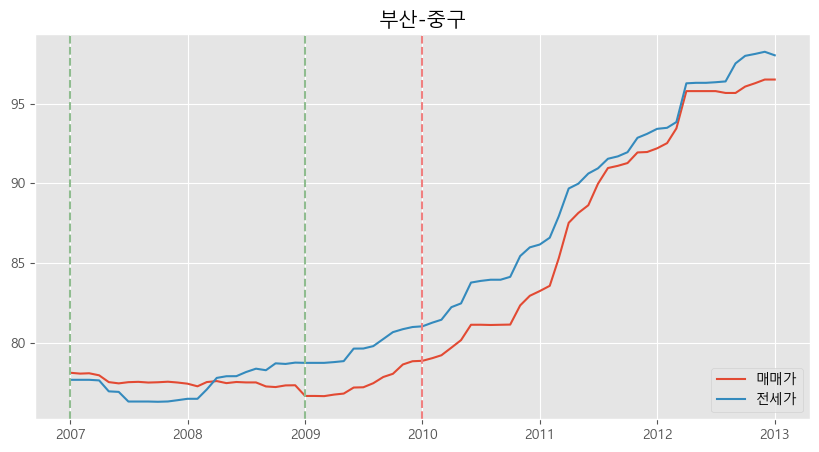

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, style

style.use('ggplot')

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)


si = '부산'
gu = '중구'

index_date = datetime(2010,1,1)

prev_date = index_date - relativedelta(months=12)
prev_date2 = index_date - relativedelta(months=36)
graph_start = index_date - relativedelta(years=3)
graph_end = index_date + relativedelta(years=3)

plt.figure(figsize=(10,5))
plt.title(si + '-' + gu)
plt.plot(price_index[si][gu][graph_start:graph_end], label='매매가')
plt.plot(jeonse_index[si][gu][graph_start:graph_end], label='전세가')
plt.axvline(x=index_date, color='lightcoral', linestyle='--')
plt.axvline(x=prev_date, color='darkseagreen', linestyle='--')
plt.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
plt.legend()
plt.show()

In [107]:
for name in demand_df.index:
    print(name)

('서울', '동대문구')
('서울', '종로구')
('서울', '강남')
('서울', '영등포구')
('부산', '중구')
('부산', '동래구')
('부산', '북구')
('부산', '해운대구')
('부산', '사하구')
('부산', '금정구')
('부산', '사상구')
('광주', '남구')
('대전', '동구')
('대전', '중구')
('대전', '서구')
('대전', '유성구')
('울산', '동구')
('울산', '북구')
('울산', '울주군')
('충북', '청주')
('충북', '상당구')
('충북', '흥덕구')
('전북', '덕진구')
('전북', '익산')
('전남', '목포')
('전남', '순천')
('전남', '여수')
('경남', '창원')
('경남', '양산')
('경남', '거제')
('제주도', '서귀포')


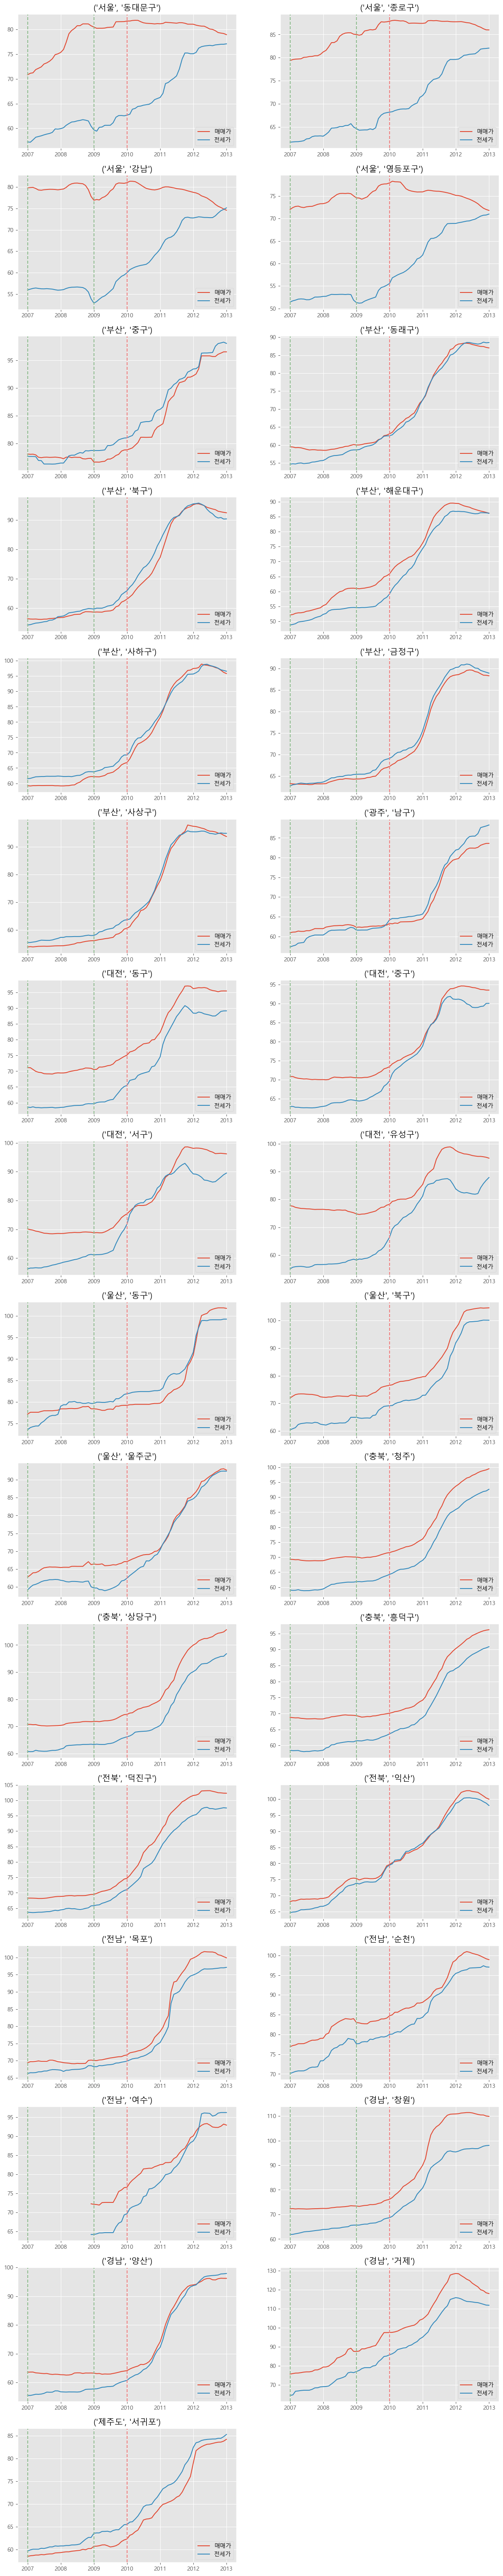

In [109]:
num_row = int((len(demand_df.index)-1)/2)+1

plt.figure(figsize=(15,num_row*5))
for i, spot in enumerate(demand_df.index):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    si = spot[0]
    gu = spot[1]
    plt.plot(price_index[si][gu][graph_start:graph_end], label='매매가')
    plt.plot(jeonse_index[si][gu][graph_start:graph_end], label='전세가')
    plt.axvline(x=index_date, color='lightcoral', linestyle='--')
    plt.axvline(x=prev_date, color='darkseagreen', linestyle='--')
    plt.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
    plt.legend(loc='lower right')
plt.show()

## 공급량이 부동산 가격에 미치는 영향

### 주택건설 인허가
- 인허량이 증가하면 인허가를 받고 준공하기까지 시간이 걸리므로 특정 시점에 부동산 공급이 증가하여 가격에 부정적인 영향을 끼칠 수 있음
- 인허가의 증가는 공급이 증가할 가능성이 높지만 공급이 수요보다 높을거라는 보장은 없음

### 미분양 데이터
- 팔리지 않고 남아있는 주택에 관한 데이터
- 미분양 데이터의 갑작스런 증가는 시장에 아주 부정적인 신호로 확실하게 공급이 많은 상태

In [120]:
permission_path = r'../../주택건설인허가실적.xlsx'
permission = pd.read_excel(permission_path, skiprows=10, index_col=0)

In [122]:
permission = permission.T

In [152]:
new_index = []

for old_date in permission.index:
    temp_list = old_date.split(' ')
    new_index.append(temp_list[0][:4]+'.'+temp_list[1][:2])

In [158]:
permission.index = pd.to_datetime(new_index)

C:\Users\laiep\AppData\Local\Temp\ipykernel_34628\1530917537.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  permission.index = pd.to_datetime(new_index)


In [164]:
permission.columns.name = None
permission

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007-01-01,12038,1530,455,818,69,1022,55,183,-,2647,452,188,1004,888,206,698,1691,132
2007-02-01,17751,794,1099,2731,116,1178,34,1173,-,2870,190,305,1306,602,494,2244,2515,100
2007-03-01,20038,1888,2121,1047,930,1347,65,685,-,3188,389,694,1890,663,391,2314,2321,105
2007-04-01,19186,1963,364,514,3337,226,81,2281,-,3987,1154,464,701,474,1219,1224,1049,148
2007-05-01,30593,1866,897,575,211,2071,511,244,-,13168,513,680,3087,311,353,850,5178,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-01,46737,5291,1679,1213,3608,471,227,1931,68,15294,3282,2141,2207,520,2432,3468,1898,1007
2018-05-01,38919,5490,2391,1252,1132,953,278,676,68,9278,2784,1770,728,1906,1651,3894,3558,1110
2018-06-01,44278,3625,5269,3536,396,2363,241,1571,37,12027,3448,5055,1287,701,1198,2182,848,494
2018-07-01,58295,6305,10817,829,1850,5436,2372,197,81,13733,2244,2522,1767,1567,2471,3607,1949,548


In [336]:
unsold_path = r'../../시·군·구별+미분양현황_2082_128_20181229151931.xlsx'
unsold_raw = pd.read_excel(unsold_path, skiprows=1, index_col=0)

C:\Users\laiep\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [338]:
del unsold_raw['시군구']

In [340]:
unsold = unsold_raw.T

In [342]:
unsold.columns.name = None

In [348]:
unsold.fillna(0, inplace=True)

In [354]:
unsold.index = pd.to_datetime(unsold.index)

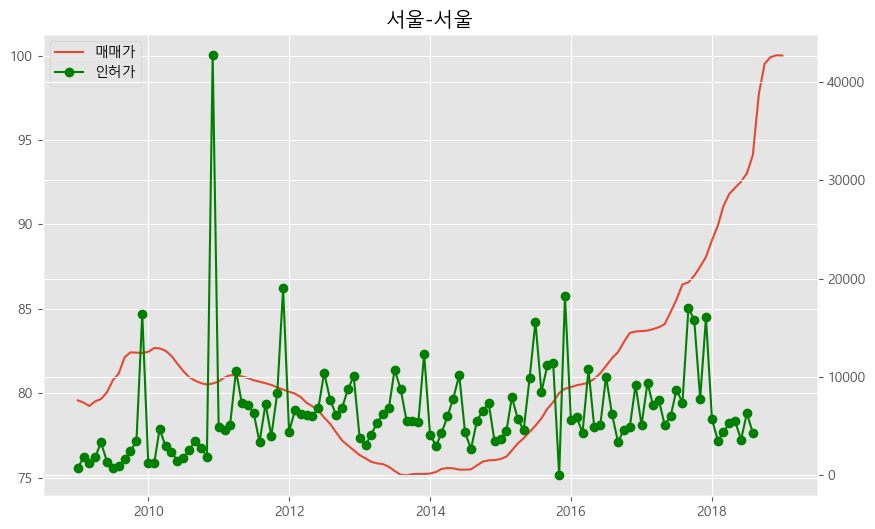

In [186]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si+'-'+gu)
ln1 = ax.plot(price_index[si][gu]['2009-1':], label='매매가')
ln2 = ax2.plot(permission[si]['2009-1':], label='인허가', color='green', marker='o')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

plt.show()

In [270]:
permission['Year'] = permission.index.year  # 연도 열 추가

# Step 1: '-' 문자열을 NaN으로 처리
permission.replace("-", 0, inplace=True)

# Step 2: 숫자로 변환
permission = permission.apply(pd.to_numeric, errors="coerce")

# Step 3: NaN 값을 0으로 대체
permission.fillna(0, inplace=True)

result = permission.groupby('Year').sum()

C:\Users\laiep\AppData\Local\Temp\ipykernel_34628\1863966803.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  permission.replace("-", 0, inplace=True)


In [272]:
result

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
Year,,,,,,,,,,,,,,,,,,
2007,555792,62842,41254,18174,41571,13088,11180,24507,0,198138,10677,19983,29317,11842,15255,24285,31503,2176
2008,371285,48417,13594,22880,33632,3945,14556,5897,0,115531,13235,10014,21657,12063,10849,15881,24375,4759
2009,381787,36090,6506,6645,59519,5024,1849,6728,0,159549,12312,11537,22860,11634,8984,13316,17119,2115
2010,386542,69190,18331,4724,37477,4487,4034,4904,0,143551,9312,8504,15331,12299,17599,13684,18234,4881
2011,549594,88060,37256,12462,35905,16059,19736,13146,0,148191,12989,18010,46794,16117,15576,16936,39339,13018
2012,586884,86123,42333,13012,32132,19584,6708,9751,17434,151035,12156,24773,44450,24288,22222,25713,44760,10256
2013,440116,77621,29922,18078,18907,8454,5180,5344,17844,96082,12964,19267,32343,13179,20061,23878,34683,6309
2014,515251,65249,17210,19079,13583,11056,5073,12502,12447,163057,12977,16391,35564,13768,17628,41438,49424,8805
2015,765328,101235,33535,27118,30590,14673,7987,12459,15235,276948,18868,31125,40311,22552,15631,53046,45325,18690


In [280]:
modified_permission = result.shift(2)
temp = []
for year in modified_permission.index:
    temp.append(str(year) + '-6-1')

modified_permission.index = pd.to_datetime(temp)

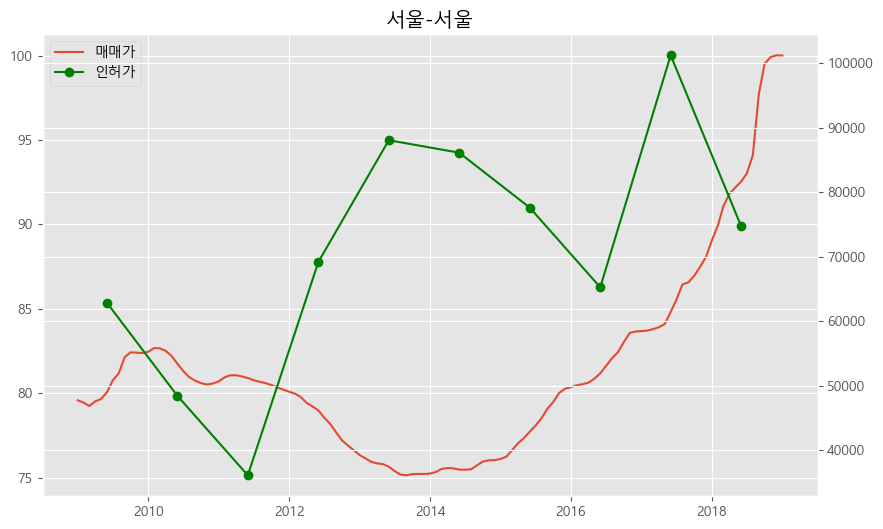

In [286]:
#[예제 3.36] 수정한 인허가 데이터와 매매가 지수 그래프 

plt.figure(figsize=(10,6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si + '-' + gu)
ln1 = ax.plot(price_index[si][gu]['2009-1':], label='매매가')
ln2 = ax2.plot(modified_permission[si]['2009':], label='인허가', color='green',marker="o")
lns = ln1 +ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
    
plt.show()

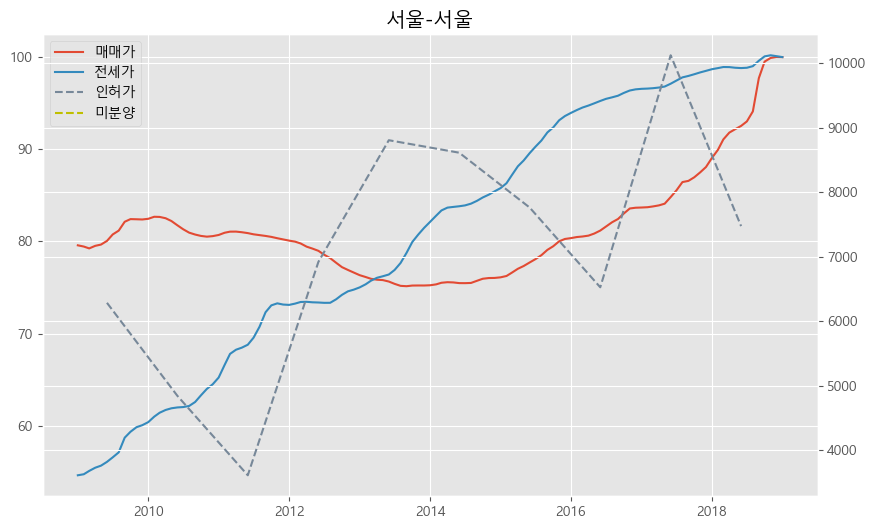

In [320]:
# [예제 3.37] 미분양 데이터를 추가한 그래프 

plt.figure(figsize=(10,6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si + '-' + gu)
ln1 = ax.plot(price_index[si][gu]['2009-1':], label='매매가')
ln2 = ax.plot(jeonse_index[si][gu]['2009-1':], label='전세가')
ln3 = ax2.plot(modified_permission[si]['2009':]/10, label='인허가', color='lightslategray', ls='--')
ln4 = ax2.plot(unsold[si][2009:], label='미분양', color='y', ls='--')
lns = ln1 +ln2 + ln3 + ln4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
    
plt.show()

In [324]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def demand(price_index, jeonse_index, index_date, time_range):

    prev_date = index_date - relativedelta(months=time_range)
    prev_date2 = index_date - relativedelta(months=time_range*3)

    demand_df = pd.DataFrame()
    demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date])/ price_index.loc[prev_date].replace(0,None)
    demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date])/jeonse_index.loc[prev_date].replace(0,None)
    demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
    demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값']) /demand_df['이전최대값'].replace(0,None)

    demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
    demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01
    demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
    demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0
    demand_df['수요총합'] = demand_df[['매매가상승','전세가상승','더빠른전세상승','최댓값대비상승']].sum(axis=1)

    demand_df = demand_df[demand_df['수요총합'] == 4]

    seleted_index = []

    for name in demand_df.index:
        if name[0] is not name[1]:
            seleted_index.append((name[0], name[1]))

    demand_df = demand_df.loc[seleted_index]
    
    return demand_df


index_date = datetime(2013, 1, 1)
time_range = 12
demand_1 = demand(price_index, jeonse_index, index_date, time_range)

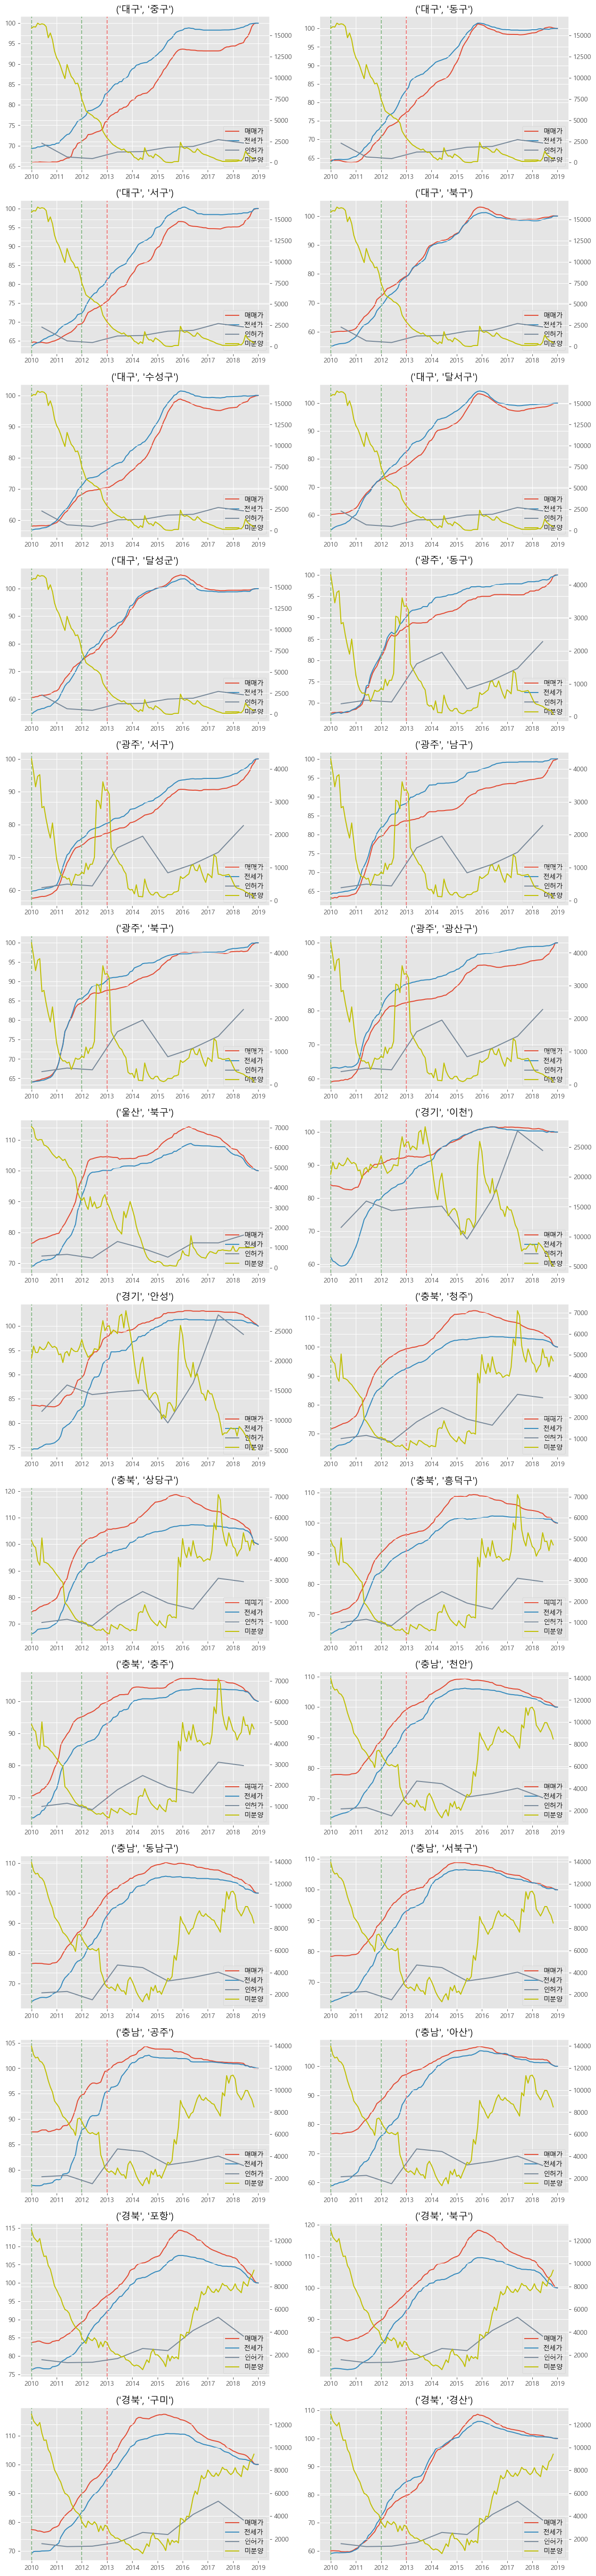

In [358]:
# [예제 3.40] demand 함수 결과를 인허가, 미분양 데이터와 함께 보기

prev_date = index_date - relativedelta(months=time_range)
prev_date2 = index_date - relativedelta(months=time_range * 3)
graph_start = index_date - relativedelta(months=time_range * 3)

num_row = int((len(demand_1.index)-1)/2)+1

plt.figure(figsize=(15, num_row*5))
for i, spot in enumerate(demand_1.index):
    ax = plt.subplot(num_row, 2, i+1)
    si = spot[0]
    gu = spot[1]
    plt.title(spot)
    ax2 = ax.twinx()
    ln1 = ax.plot(price_index[si][gu][graph_start:], label='매매가')
    ln2 = ax.plot(jeonse_index[si][gu][graph_start:], label='전세가')
    ln3 = ax2.plot(modified_permission[si][graph_start:]/10,  color='lightslategray', label='인허가')
    ln4 = ax2.plot(unsold[si][graph_start:], color='y', label='미분양')
    ax.axvline(x=index_date, color='lightcoral', linestyle='--')
    ax.axvline(x=prev_date, color='darkseagreen', linestyle='--')
    ax.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
    lns = ln1 +ln2 + ln3 + ln4
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='lower right')

plt.show()